## Biểu đồ số lượng lớp

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np

# Định nghĩa các lớp
class_names = {0: 'drinking', 1: 'raising_hand', 2: 'sleeping', 
               3: 'using_computer', 4: 'using_phone', 5: 'writing'}

# Đường dẫn đến các thư mục labels
train_labels_dir = "/hdd2/minhnv/CodingYOLOv12/Dataset/Student-Behavior-Recognition-6/train/labels"
val_labels_dir = "/hdd2/minhnv/CodingYOLOv12/Dataset/Student-Behavior-Recognition-6/valid/labels"
test_labels_dir = "/hdd2/minhnv/CodingYOLOv12/Dataset/Student-Behavior-Recognition-6/test/labels"

def count_classes(labels_dir):
    """Đếm số lượng objects cho từng class trong thư mục labels"""
    counts = {cls: 0 for cls in class_names.keys()}
    
    for filename in os.listdir(labels_dir):
        if filename.endswith('.txt'):
            with open(os.path.join(labels_dir, filename), 'r') as f:
                lines = f.readlines()
                for line in lines:
                    if line.strip():
                        cls_id = int(line.strip().split()[0])
                        if cls_id in counts:
                            counts[cls_id] += 1
    return counts

# Lấy số lượng objects cho từng tập
train_counts = count_classes(train_labels_dir)
val_counts = count_classes(val_labels_dir)
test_counts = count_classes(test_labels_dir)

# Chuẩn bị dữ liệu để visualize
classes = sorted(class_names.keys())
class_labels = [class_names[cls] for cls in classes]
train_values = [train_counts[cls] for cls in classes]
val_values = [val_counts[cls] for cls in classes]
test_values = [test_counts[cls] for cls in classes]

x = np.arange(len(class_labels))  # Vị trí các nhãn
width = 0.25  # Độ rộng của các cột

# Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(14, 8))
rects1 = ax.bar(x - width, train_values, width, label='Train')
rects2 = ax.bar(x, val_values, width, label='Validation')
rects3 = ax.bar(x + width, test_values, width, label='Test')

# Thêm các thành phần cho biểu đồ
ax.set_ylabel('Số lượng instances')
ax.set_title('Phân bố số lượng instances theo lớp và tập dữ liệu')
ax.set_xticks(x)
ax.set_xticklabels(class_labels, rotation=45, ha='right')
ax.legend()

# Hiển thị số trên mỗi cột
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height}',
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.tight_layout()
plt.show()

## Xóa lớp Driking và raising_hand

In [2]:
import os
import glob

# Mapping các lớp ban đầu:
# 0: 'drinking', 1: 'raising_hand', 2: 'sleeping', 
# 3: 'using_computer', 4: 'using_phone', 5: 'writing'
# Sau khi loại bỏ drinking (0) và raising_hand (1) ta tạo mapping mới:
# 2 -> 0, 3 -> 1, 4 -> 2, 5 -> 3
mapping = {2: 0, 3: 1, 4: 2, 5: 3}
new_class_names = {0: 'sleeping', 1: 'using_computer', 2: 'using_phone', 3: 'writing'}

# Đường dẫn đến thư mục chứa file nhãn
train_labels_dir = "/hdd2/minhnv/CodingYOLOv12/Dataset/Student-Behavior-Recognition-6/train/labels"
val_labels_dir   = "/hdd2/minhnv/CodingYOLOv12/Dataset/Student-Behavior-Recognition-6/valid/labels"
test_labels_dir  = "/hdd2/minhnv/CodingYOLOv12/Dataset/Student-Behavior-Recognition-6/test/labels"

def process_label_file(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()
    
    new_lines = []
    for line in lines:
        parts = line.strip().split()
        # Nếu dòng trống, bỏ qua
        if not parts:
            continue
        try:
            cls = int(parts[0])
        except ValueError:
            continue  # nếu không convert được, bỏ qua dòng này
        
        # Nếu đối tượng thuộc lớp cần loại bỏ, không thêm dòng vào new_lines
        if cls in [0, 1]:
            continue
        
        # Nếu đối tượng thuộc các lớp còn lại, cập nhật lại chỉ số lớp theo mapping mới
        if cls in mapping:
            new_cls = mapping[cls]
            new_line = " ".join([str(new_cls)] + parts[1:]) + "\n"
            new_lines.append(new_line)
        else:
            # Trường hợp ngoài dự kiến, giữ nguyên dòng
            new_lines.append(line)
    
    # Ghi đè file với nội dung mới
    with open(file_path, 'w') as f:
        f.writelines(new_lines)

def process_directory(labels_dir):
    txt_files = glob.glob(os.path.join(labels_dir, "*.txt"))
    for file in txt_files:
        process_label_file(file)
    print(f"Đã xử lý {len(txt_files)} file trong {labels_dir}")

# Xử lý các thư mục nhãn: train, valid, test
process_directory(train_labels_dir)
process_directory(val_labels_dir)
process_directory(test_labels_dir)

print("Quá trình xóa lớp 'drinking' và 'raising_hand' đã hoàn thành!")


Đã xử lý 3099 file trong /hdd2/minhnv/CodingYOLOv12/Dataset/Student-Behavior-Recognition-6/train/labels
Đã xử lý 295 file trong /hdd2/minhnv/CodingYOLOv12/Dataset/Student-Behavior-Recognition-6/valid/labels
Đã xử lý 147 file trong /hdd2/minhnv/CodingYOLOv12/Dataset/Student-Behavior-Recognition-6/test/labels
Quá trình xóa lớp 'drinking' và 'raising_hand' đã hoàn thành!


## Sau khi xóa

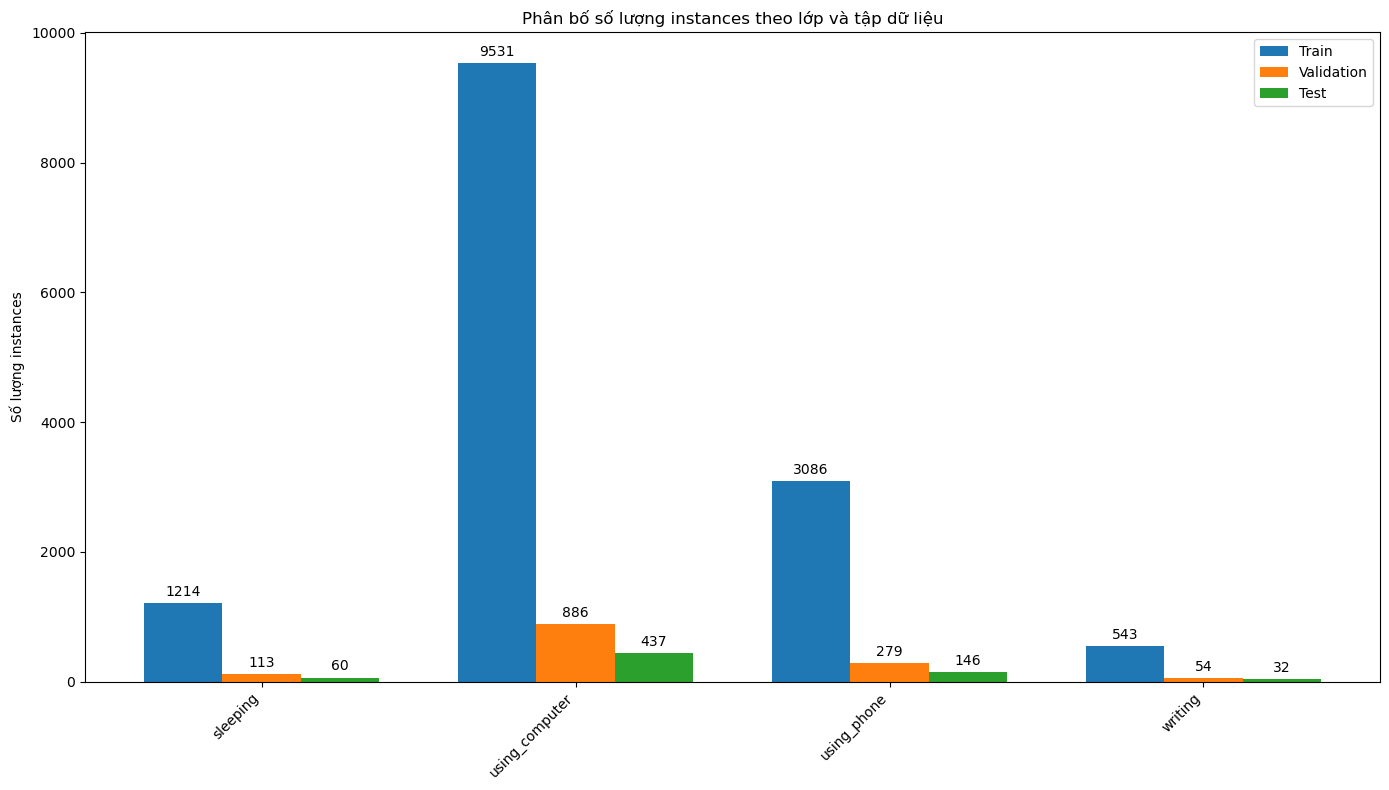

In [6]:
import os
import matplotlib.pyplot as plt
import numpy as np

# Định nghĩa các lớp
class_names = {0: 'sleeping', 
               1: 'using_computer', 2: 'using_phone', 3: 'writing'}

# Đường dẫn đến các thư mục labels
train_labels_dir = "/hdd2/minhnv/CodingYOLOv12/Dataset/Student-Behavior-Recognition-6/train/labels"
val_labels_dir = "/hdd2/minhnv/CodingYOLOv12/Dataset/Student-Behavior-Recognition-6/valid/labels"
test_labels_dir = "/hdd2/minhnv/CodingYOLOv12/Dataset/Student-Behavior-Recognition-6/test/labels"

def count_classes(labels_dir):
    """Đếm số lượng objects cho từng class trong thư mục labels"""
    counts = {cls: 0 for cls in class_names.keys()}
    
    for filename in os.listdir(labels_dir):
        if filename.endswith('.txt'):
            with open(os.path.join(labels_dir, filename), 'r') as f:
                lines = f.readlines()
                for line in lines:
                    if line.strip():
                        cls_id = int(line.strip().split()[0])
                        if cls_id in counts:
                            counts[cls_id] += 1
    return counts

# Lấy số lượng objects cho từng tập
train_counts = count_classes(train_labels_dir)
val_counts = count_classes(val_labels_dir)
test_counts = count_classes(test_labels_dir)

# Chuẩn bị dữ liệu để visualize
classes = sorted(class_names.keys())
class_labels = [class_names[cls] for cls in classes]
train_values = [train_counts[cls] for cls in classes]
val_values = [val_counts[cls] for cls in classes]
test_values = [test_counts[cls] for cls in classes]

x = np.arange(len(class_labels))  # Vị trí các nhãn
width = 0.25  # Độ rộng của các cột

# Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(14, 8))
rects1 = ax.bar(x - width, train_values, width, label='Train')
rects2 = ax.bar(x, val_values, width, label='Validation')
rects3 = ax.bar(x + width, test_values, width, label='Test')

# Thêm các thành phần cho biểu đồ
ax.set_ylabel('Số lượng instances')
ax.set_title('Phân bố số lượng instances theo lớp và tập dữ liệu')
ax.set_xticks(x)
ax.set_xticklabels(class_labels, rotation=45, ha='right')
ax.legend()

# Hiển thị số trên mỗi cột
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height}',
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.tight_layout()
plt.show()

## Visualize image

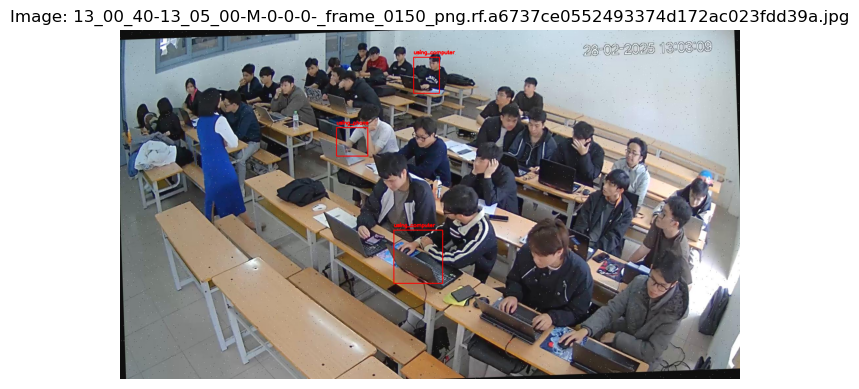

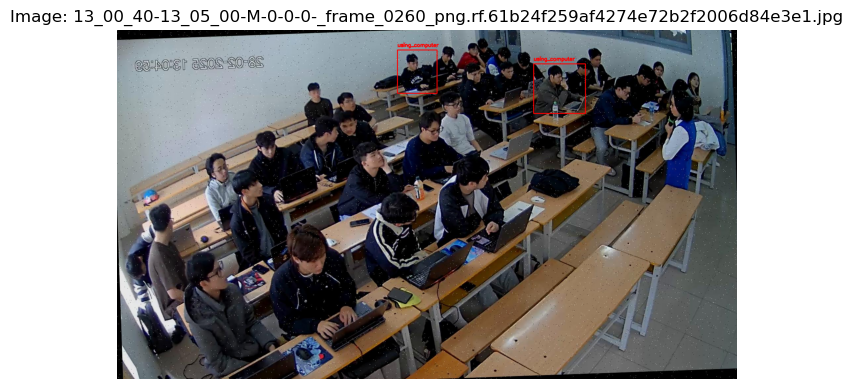

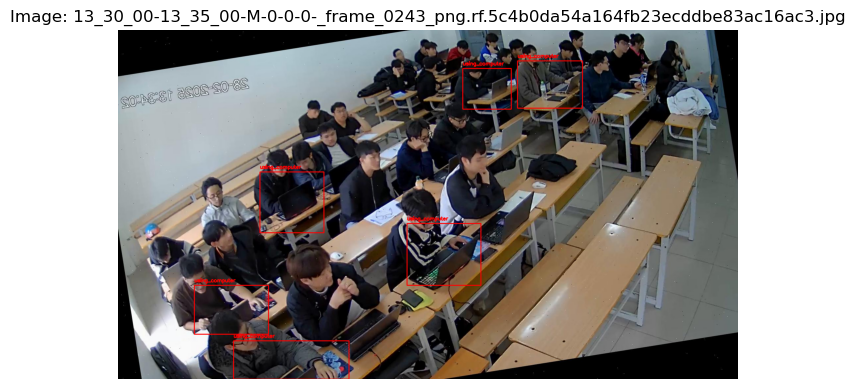

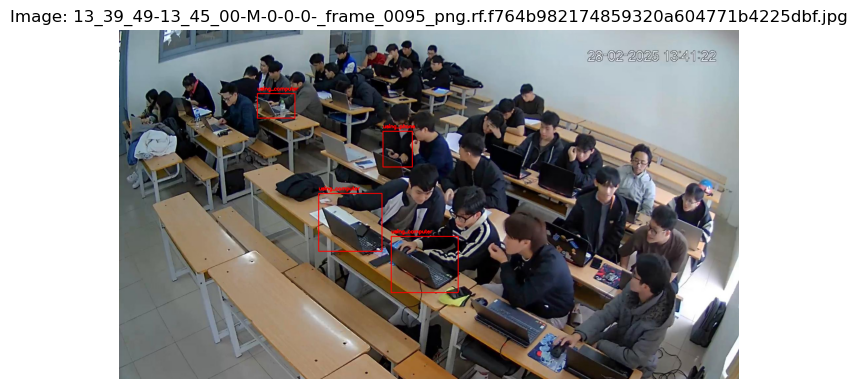

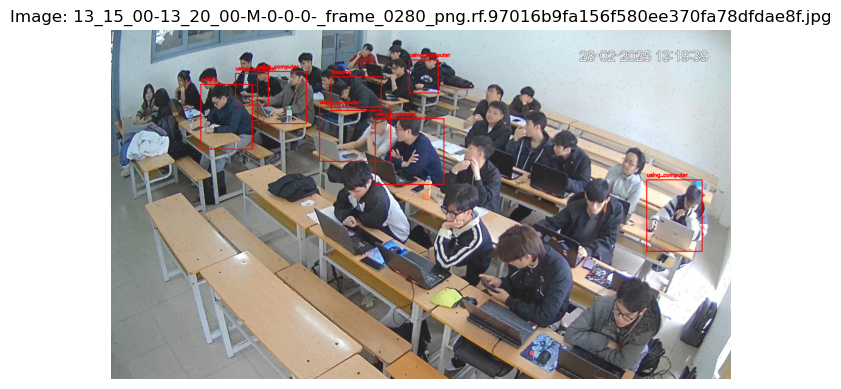

In [8]:
import os
import glob
import random
import cv2
import matplotlib.pyplot as plt

# Đường dẫn tới folder ảnh và label (ví dụ sử dụng cho train)
train_images_dir = "/hdd2/minhnv/CodingYOLOv12/Dataset/Student-Behavior-Recognition-6/train/images"
train_labels_dir = "/hdd2/minhnv/CodingYOLOv12/Dataset/Student-Behavior-Recognition-6/train/labels"

# Mapping tên lớp sau khi cập nhật (đã xóa 'drinking' và 'raising_hand')
new_class_names = {0: 'sleeping', 1: 'using_computer', 2: 'using_phone', 3: 'writing'}

def load_bounding_boxes(label_file, img_width, img_height):
    """
    Đọc file label (YOLO format) và chuyển đổi các tọa độ chuẩn hóa sang pixel.
    Mỗi dòng có định dạng: class_id center_x center_y width height
    """
    boxes = []
    with open(label_file, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if not parts:
                continue
            try:
                cls = int(parts[0])
                cx, cy, w, h = map(float, parts[1:])
            except ValueError:
                continue
            # Chuyển đổi tọa độ chuẩn hóa sang pixel
            x_center = cx * img_width
            y_center = cy * img_height
            box_width = w * img_width
            box_height = h * img_height
            # Tính tọa độ góc trái trên và góc phải dưới
            x1 = int(x_center - box_width / 2)
            y1 = int(y_center - box_height / 2)
            x2 = int(x_center + box_width / 2)
            y2 = int(y_center + box_height / 2)
            boxes.append((cls, x1, y1, x2, y2))
    return boxes

def visualize_images_with_boxes(images_dir, labels_dir, num_samples=5):
    # Lấy danh sách các file ảnh (có thể là *.jpg, *.png,...)
    image_paths = glob.glob(os.path.join(images_dir, "*.*"))
    if len(image_paths) == 0:
        print("Không tìm thấy ảnh trong thư mục", images_dir)
        return

    sampled_images = random.sample(image_paths, min(num_samples, len(image_paths)))
    
    for image_path in sampled_images:
        # Đọc ảnh sử dụng OpenCV
        img = cv2.imread(image_path)
        if img is None:
            continue
        # Chuyển sang RGB để hiển thị đúng màu sắc với matplotlib
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        h, w, _ = img.shape

        # Lấy file label tương ứng (giả sử file label có cùng tên với file ảnh)
        image_name = os.path.splitext(os.path.basename(image_path))[0]
        label_file = os.path.join(labels_dir, image_name + ".txt")
        if not os.path.exists(label_file):
            print(f"Không tìm thấy file label cho ảnh {image_name}")
            continue

        # Lấy bounding box từ file label
        boxes = load_bounding_boxes(label_file, w, h)

        # Vẽ bounding box và tên lớp lên ảnh
        for box in boxes:
            cls, x1, y1, x2, y2 = box
            # Chọn màu (ở đây dùng màu đỏ)
            color = (255, 0, 0)
            # Vẽ hình chữ nhật
            cv2.rectangle(img_rgb, (x1, y1), (x2, y2), color, 2)
            # Ghi tên lớp (nếu có trong mapping mới, nếu không thì in class id)
            label = new_class_names.get(cls, str(cls))
            cv2.putText(img_rgb, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
        
        # Hiển thị ảnh với bounding box
        plt.figure(figsize=(8, 6))
        plt.imshow(img_rgb)
        plt.title(f"Image: {os.path.basename(image_path)}")
        plt.axis("off")
        plt.show()

# Gọi hàm hiển thị
visualize_images_with_boxes(train_images_dir, train_labels_dir, num_samples=5)
